<center><h1> TD N°1 : SVM avec sklearn </h1></center>
    
    
Pour installer un package vous pouvez utiliser la commande suivante :
    
```
!pip install <nom_module>
```

## Import package

In [8]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

#Web request
import requests
import io

## Function

**Merci de lire comment s'utilise la fonction avant de l'utiliser !**

In [35]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [36]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coefficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisées.
      ATTENTION les passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)<br>
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [ ]:
#1
#Import dataset from sklearn

sk_iris = datasets.load_iris()

#Si besoin
iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )

# On supprime les espaes et les parenthèses pour les colonnes 



#### 2) Statistiques descriptives

In [ ]:
# On fait un value.counts() pour voir la distribution des species

In [ ]:
# On vérifie si il y a des valeurs manquantes 

In [ ]:
# Analyse des corrélations 

In [ ]:
import pygwalker as pyg

# Use pygwalker to generate visualizations
pyg.walk(iris)

#### 3) Recoder variables, si besoin

In [ ]:
print(iris.info())

# On met species en integer


# On veut faire des stat des sur species
print(iris['species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None
species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [ ]:
# On garde les deux premières espèces

iris = iris[iris['species'].isin(['0.0','1.0'])]

Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species]
Index: []


#### 4) Découper data set en train et test

In [ ]:
# On fait un split train test

# Il faut randomizer les informations pour éviter les biais (avec shuffle)

X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features ⚠️

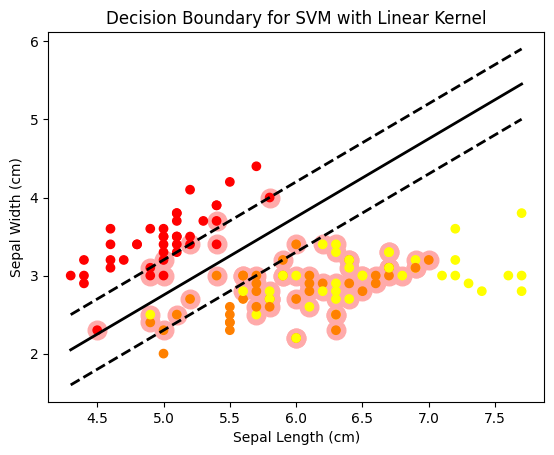

In [ ]:
# On garde uniquement deux features pour la modélisation binaire 

X_train_2_features = X_train[['sepal length (cm)', 'sepal width (cm)']]
X_test_2_features = X_test[['sepal length (cm)', 'sepal width (cm)']]

# SVM model
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train_2_features, y_train)

# Plot the decision boundary
plot_svc_decision_boundary(svm_clf, X_train_2_features['sepal length (cm)'].min(), X_train_2_features['sepal length (cm)'].max())
plt.scatter(X_train_2_features['sepal length (cm)'], X_train_2_features['sepal width (cm)'], c=y_train, cmap='autumn')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundary for SVM with Linear Kernel')
plt.show()

### Faire varier le critère de régularisation C

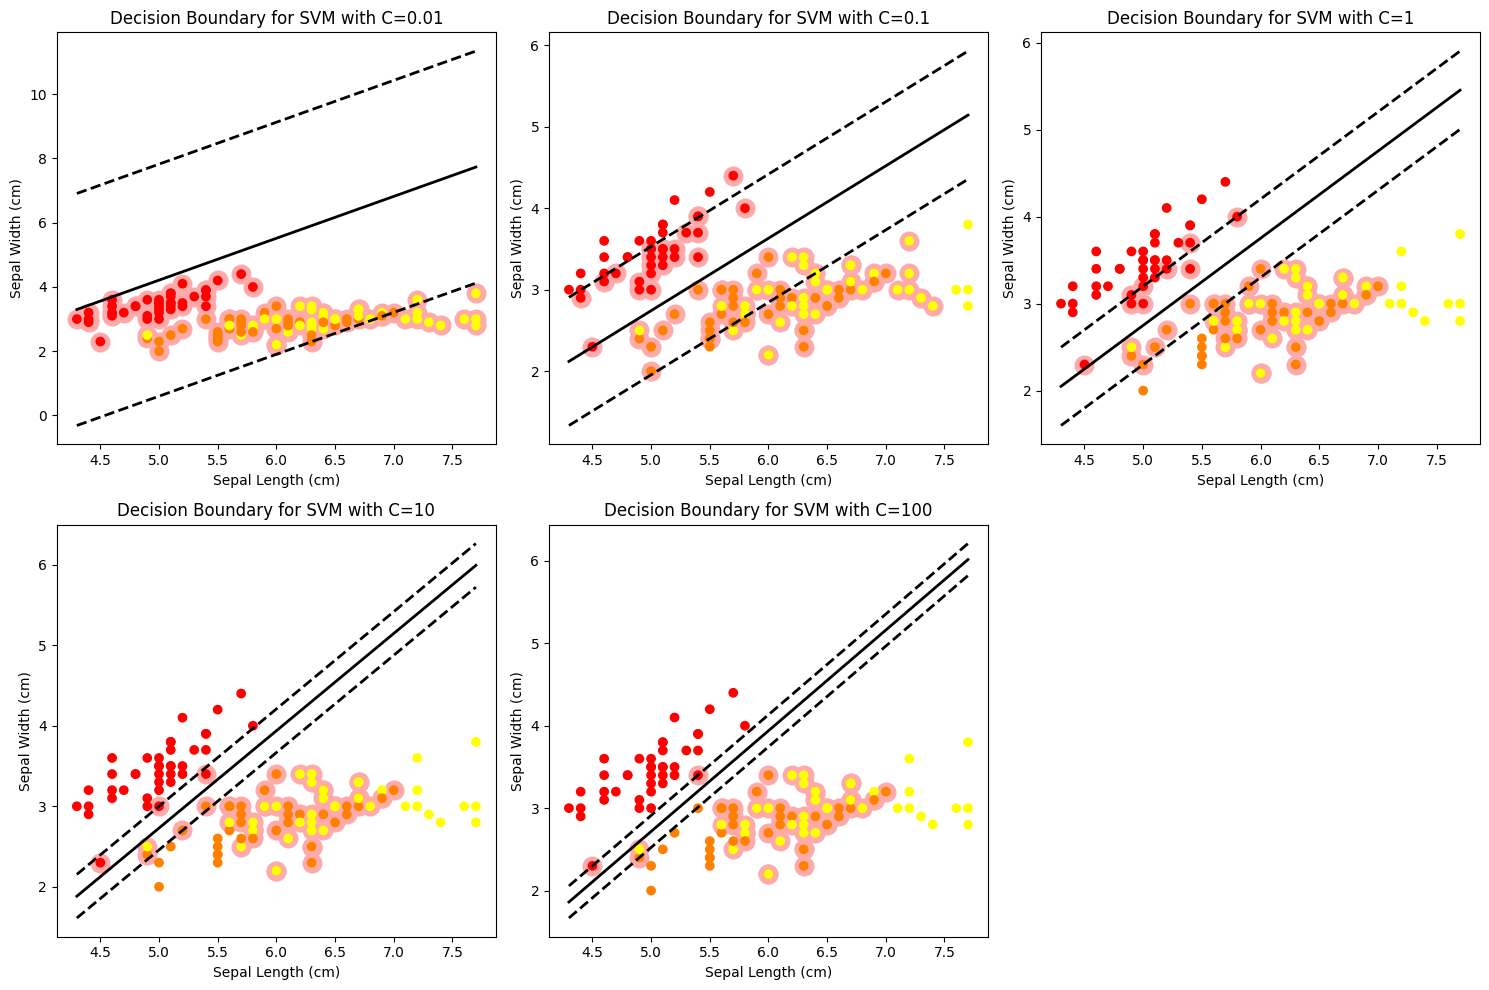

In [47]:
# On fait varier le critère de régularisation C

# Une liste avec les différentes valeurs de C à tester
C_values = [0.01, 0.1, 1, 10, 100]

# On crée une figure pour afficher les graphiques
plt.figure(figsize=(15, 10))

for i, C in enumerate(C_values):
    # On entraîne le modèle avec la valeur de C actuelle
    svm_clf = SVC(kernel='linear', C=C)
    svm_clf.fit(X_train_2_features, y_train)
    
    # On plot la decision boundary
    plt.subplot(2, 3, i + 1)
    plot_svc_decision_boundary(svm_clf, X_train_2_features['sepal length (cm)'].min(), X_train_2_features['sepal length (cm)'].max())
    plt.scatter(X_train_2_features['sepal length (cm)'], X_train_2_features['sepal width (cm)'], c=y_train, cmap='autumn')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(f'Decision Boundary for SVM with C={C}')

plt.tight_layout()
plt.show()

##### Commenter l'effet de C



Lorsque la valeur du paramètre de régularisation $C$ augmente, le modèle SVM est moins régularisé, ce qui lui permet de s'adapter plus étroitement aux données d'apprentissage. Cela peut conduire à une frontière de décision plus complexe qui sépare mieux les points de données d'apprentissage. Cependant, une valeur très élevée de $C$ peut entraîner une suradaptation du modèle aux données d'apprentissage, capturant le bruit et réduisant sa capacité de généralisation à de nouvelles données inédites.

Inversement, une valeur plus petite de $C$ impose une régularisation plus forte, ce qui se traduit par une limite de décision plus simple qui peut ne pas s'adapter aussi étroitement aux données d'apprentissage. Cela permet d'éviter le surajustement et d'améliorer la capacité de généralisation du modèle, mais peut également conduire à un sous-ajustement si la limite de décision est trop simple pour capturer les modèles sous-jacents dans les données.

En résumé, $C$ contrôle le compromis entre une faible erreur d'apprentissage et une faible erreur de test, et la recherche de la valeur optimale de $C$ est cruciale pour les performances du modèle.


#### Changer de paire de feature

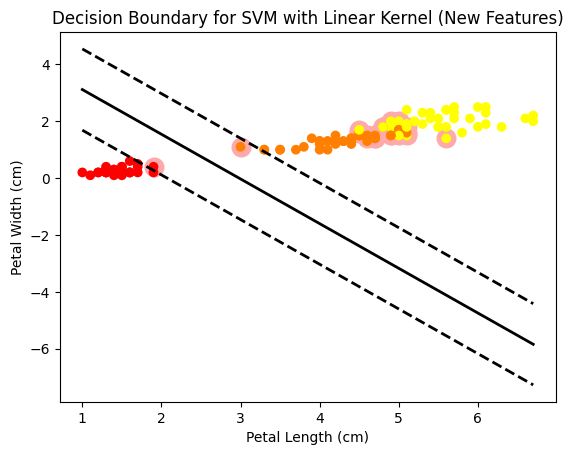

In [48]:
# Select another pair of features for training
X_train_2_features_new = X_train[['petal length (cm)', 'petal width (cm)']]
X_test_2_features_new = X_test[['petal length (cm)', 'petal width (cm)']]

# Train the SVM model with the new pair of features
svm_clf_new = SVC(kernel='linear', C=1)
svm_clf_new.fit(X_train_2_features_new, y_train)

# Plot the decision boundary for the new pair of features
plot_svc_decision_boundary(svm_clf_new, X_train_2_features_new['petal length (cm)'].min(), X_train_2_features_new['petal length (cm)'].max())
plt.scatter(X_train_2_features_new['petal length (cm)'], X_train_2_features_new['petal width (cm)'], c=y_train, cmap='autumn')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary for SVM with Linear Kernel (New Features)')
plt.show()

#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [11]:
# Load the dataset from the specified file
iris_noise_df = pd.read_csv('/Users/gabammour/Documents/Master ECAP/machine_learning/cours_SVM_ANN/01_SVM/td/data/iris_noise.csv', sep=';')

# Display the first few rows of the dataset
print(iris_noise_df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


##### Modélisation binaire, 2 target

In [50]:
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear SVC': LinearSVC(),
    'SVC': SVC(),
    'SGD Classifier': SGDClassifier()
}

# Evaluate each model using 5-fold cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_2_features, y_train, cv=5)
    print(f'{model_name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}')

Logistic Regression Cross-Validation Accuracy: 0.78 ± 0.06
Linear SVC Cross-Validation Accuracy: 0.77 ± 0.04
SVC Cross-Validation Accuracy: 0.78 ± 0.07
SGD Classifier Cross-Validation Accuracy: 0.65 ± 0.03


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/V

#### Choix du modèle, justification



Logistic Regression Cross-Validation Accuracy: 1.00 ± 0.00
Linear SVC Cross-Validation Accuracy: 0.99 ± 0.02
SVC Cross-Validation Accuracy: 1.00 ± 0.00
SGD Classifier Cross-Validation Accuracy: 0.93 ± 0.07


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [28]:
#Obtenir les hyperparamètres d'un modèle
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Choix hyperparamètre à tuner et grid search



In [29]:
# Define the parameter grid for the grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_2_features, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation accuracy: 1.00


##### Learning curve

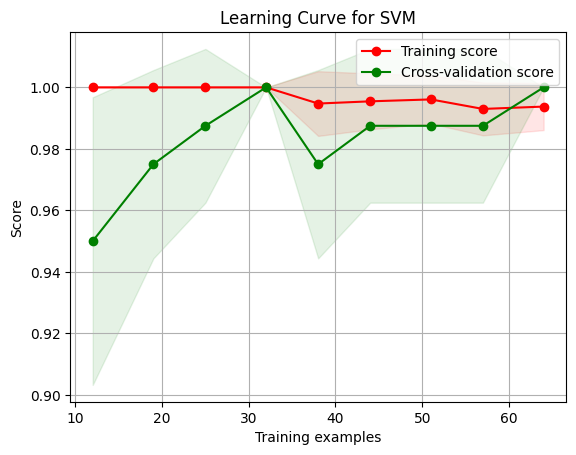

In [30]:
from sklearn.model_selection import learning_curve

# Define the model with the best parameters found from the grid search
best_svm_clf = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'], gamma=grid_search.best_params_['gamma'])

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_svm_clf, X_train_2_features, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve for SVM')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()

# Plot the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')

# Plot the cross-validation scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()

#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

In [31]:
# Train the model with the best hyperparameters on the entire training set
best_svm_clf.fit(X_train_2_features, y_train)

# Evaluate the model on the test set
test_accuracy = best_svm_clf.score(X_test_2_features, y_test)
print(f'Test set accuracy: {test_accuracy:.2f}')

Test set accuracy: 1.00


##### Commenter la qualité de prédiction



#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats
- Attention au karnel utilisé

NameError: name 'best_svm_clf' is not defined

#### Performance in et out sample

#### Influence de vos features sur le modèle

In [1435]:
#plt.title('nom_sympa')
#plt.xlabel('Valeur des coéfficients')
#svm_f_importances(<model_coef>, features_names)


## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

#### 2 Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?

- Combien de modèles faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Stratégie




**Nombre de modèles**




#### Test modélisation

3) Existe-t-il des différences entre OVO et OVR?

<center><h3> Merci de rendre lisible votre code, un groupe présentera ses travaux à l'oral à la fin du cours.</h3></center>